In [1]:
#def Prim
import numpy as np
import pickle
def swap(M):
    # SWAP = q.swap(2, 0, 1).as_unitary()
    SWAP = np.array([[1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1]])
    return np.dot(np.dot(SWAP, M), SWAP)
global I
global X
global Y
global Z
I = np.identity(2)
X = np.array([[0,   1], [1,  0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1,   0], [0, -1]])
Z_2 = (1/np.sqrt(2))*np.array([[1+1j, 0+0j], [0+0j, 1-1j]])
CNOT = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
NCNOT = np.dot(np.dot(np.kron(X, I), CNOT), np.kron(X, I))
Zv_2 = (1/np.sqrt(2))*np.array([[1-1j, 0+0j], [0+0j, 1+1j]])
X_2 = (1/np.sqrt(2))*np.array([[1+0j, 0-1j], [0-1j, 1+0j]])
X_CROT = np.dot(np.kron(Z_2, X_2), CNOT)
Z_CROT = np.dot(np.kron(Z_2, I), NCNOT)
CROT = np.dot(np.kron(Z_2, I), CNOT)

#primitive gates
Prim = [ np.kron(I, X_2) , swap(np.kron(I, X_2)) , X_CROT , swap(X_CROT) , Z_CROT , swap(Z_CROT) , CROT , swap(CROT)]

Zv = [Zv_2]
for i in range(1, 4):
    Zv.append(np.dot(Zv[i-1], Zv_2))

Zv_q1 = [ [[['Zv(pi/2)', 1]]      ],
          [[['Zv(pi)', 1]]        ],
          [[['Zv(3pi/2)', 1]]     ],
          [[['Zv(2pi)', 1]]       ] ]

Zv_q2 = [ [[['Zv(pi/2)', 2]]      ],
          [[['Zv(pi)', 2]]        ],
          [[['Zv(3pi/2)', 2]]     ],
          [[['Zv(2pi)', 2]]       ] ]

for i in range(4):
    Zv_q1[i].append(np.kron(Zv[i], I))
    Zv_q2[i].append(np.kron(I, Zv[i]))
#get Zv_q1 Zv_q2
for i in range(3):    
    Prim.append(np.kron(Zv[i], I))
for i in range(3):    
    Prim.append(np.kron(I, Zv[i]))
Prim.append(np.identity(4))
####################################################
#Prim:
#['X(pi/2)', 2]         = 0
#['X(pi/2)', 1]         = 1
#['X(pi/2)+CROT', 2]    = 2
#['X(pi/2)+CROT', 1]    = 3
#['Z(pi/2)+CROT', 2]    = 4
#['Z(pi/2)+CROT', 1]    = 5
#['CROT', 2]            = 6
#['CROT', 1]            = 7
#
#['Zv(pi/2)', 1]        = 8
#['Zv(pi)', 1]          = 9
#['Zv(3pi/2)', 1]       = 10
#['Zv(pi/2)', 2]        = 11
#['Zv(pi)', 2]          = 12
#['Zv(3pi/2)', 2]       = 13
#identity               = 14
f = open('Prim.pkl', 'wb')
pickle.dump(Prim , f)
f.close()

In [3]:
#ESR to prim (add error)
import numpy as np
from scipy.linalg import expm, sinm, cosm
import math
import pickle
Ez = 3.933e10
dEz = 1.326e7
Ω = 410000.0
J = 1.59e6
#supp eqn.7
n = 1
T_pi_2 = math.sqrt(16*n**2-1)/4/J
#perfect gate
def H_RWA1_1d(w):
    return 1/2*2*np.pi*w*np.array( [[0, 0, 0, 0],
                                    [0, 0, 0, 1],
                                    [0, 0, 0, 0],
                                    [0, 1, 0, 0]])

def H_RWA1_1u(w):
    return 1/2*2*np.pi*w*np.array( [[0, 0, 1, 0],
                                    [0, 0, 0, 0],
                                    [1, 0, 0, 0],
                                    [0, 0, 0, 0]])
def H_RWA1_2d(w):
    return 1/2*2*np.pi*w*np.array( [[0, 0, 0, 0],
                                    [0, 0, 0, 0],
                                    [0, 0, 0, 1],
                                    [0, 0, 1, 0]])

def H_RWA1_2u(w):
    return 1/2*2*np.pi*w*np.array( [[0, 1, 0, 0],
                                    [1, 0, 0, 0],
                                    [0, 0, 0, 0],
                                    [0, 0, 0, 0]])
#cross error
def H_RWA2_1d(w, t):
    return 1/2*2*np.pi*w*np.array( [[                     0, 0, np.exp(-1j*J*2*np.pi*t), 0],
                                    [                     0, 0,                       0, 0],
                                    [np.exp(1j*J*2*np.pi*t), 0,                       0, 0],
                                    [                     0, 0,                       0, 0]] )

def H_RWA2_1u(w, t):
    return 1/2*2*np.pi*w*np.array( [[0,                       0, 0,                       0],
                                    [0,                       0, 0,  np.exp(1j*J*2*np.pi*t)],
                                    [0,                       0, 0,                       0],
                                    [0, np.exp(-1j*J*2*np.pi*t), 0,                       0]] )
def H_RWA2_2d(w, t):
    return 1/2*2*np.pi*w*np.array( [[                     0, np.exp(-1j*J*2*np.pi*t), 0, 0],
                                    [np.exp(1j*J*2*np.pi*t), 0,                       0, 0],
                                    [                     0, 0,                       0, 0],
                                    [                     0, 0,                       0, 0]] )

def H_RWA2_2u(w, t):
    return 1/2*2*np.pi*w*np.array( [[0,0,                       0,                      0],
                                    [0,0,                       0,                      0],
                                    [0,0,                       0, np.exp(1j*J*2*np.pi*t)],
                                    [0,0, np.exp(-1j*J*2*np.pi*t),                      0]] )
#combine perfect and cross error
def H_RWA_1d(w, t):
    return H_RWA1_1d(w) + H_RWA2_1d(w, t)
def H_RWA_1u(w, t):
    return H_RWA1_1u(w) + H_RWA2_1u(w, t)
def H_RWA_2d(w, t):
    return H_RWA1_2d(w) + H_RWA2_2d(w, t)
def H_RWA_2u(w, t):
    return H_RWA1_2u(w) + H_RWA2_2u(w, t)
#time slice
delta = 50
L = np.linspace(0, T_pi_2, delta)

U_1d_plus = np.identity(4)   #Unitary transformation from f_1d pulse. "Plus" indicates that it is a pi/2 rotation.
U_1u_plus = np.identity(4)
U_1d_minus = np.identity(4)
U_1u_minus = np.identity(4)
U_2d_plus = np.identity(4)   #Unitary transformation from f_1d pulse. "Plus" indicates that it is a pi/2 rotation.
U_2u_plus = np.identity(4)
U_2d_minus = np.identity(4)
U_2u_minus = np.identity(4)

for t in L:
    U_1d_plus = np.dot(expm(-1j*H_RWA_1d(Ω, t)*L[1]), U_1d_plus)
    U_1u_plus = np.dot(expm(-1j*H_RWA_1u(Ω, t)*L[1]), U_1u_plus)
    U_1d_minus = np.dot(expm(1j*H_RWA_1d(Ω, t)*L[1]), U_1d_minus)   #TODO:Figure out how to construct -pi/2 pulse physically.
    U_1u_minus = np.dot(expm(1j*H_RWA_1u(Ω, t)*L[1]), U_1u_minus)
    U_2d_plus = np.dot(expm(-1j*H_RWA_2d(Ω, t)*L[1]), U_2d_plus)
    U_2u_plus = np.dot(expm(-1j*H_RWA_2u(Ω, t)*L[1]), U_2u_plus)
    U_2d_minus = np.dot(expm(1j*H_RWA_2d(Ω, t)*L[1]), U_2d_minus)   #TODO:Figure out how to construct -pi/2 pulse physically.
    U_2u_minus = np.dot(expm(1j*H_RWA_2u(Ω, t)*L[1]), U_2u_minus)

X_2_exp_q1 = np.dot(U_1u_plus, U_1d_plus)              #prim1
X_CROT_exp_q1 = np.dot(U_1u_plus, U_1d_minus)          #prim3
Z_CROT_exp_q1 = np.dot(U_1u_plus, U_1u_plus)           #prim5
CROT_exp_q1 = np.dot(U_1d_minus, U_1d_minus)           #prim7
X_2_exp_q2 = np.dot(U_2u_plus, U_2d_plus)              #prim0
X_CROT_exp_q2 = np.dot(U_2u_plus, U_2d_minus)          #prim2
Z_CROT_exp_q2 = np.dot(U_2u_plus, U_2u_plus)           #prim4
CROT_exp_q2 = np.dot(U_2d_minus, U_2d_minus)           #prim6
#print(X_2_exp_q1)
#print(X_2_exp_q2)
#open Prim put into Prim
with open("Prim.pkl", "rb") as f2:  
    Prim = pickle.load(f2)
f2.close()
Prim[1]=X_2_exp_q1
Prim[3]=X_CROT_exp_q1
Prim[5]=Z_CROT_exp_q1
Prim[7]=CROT_exp_q1
Prim[0]=X_2_exp_q2
Prim[2]=X_CROT_exp_q2
Prim[4]=Z_CROT_exp_q2
Prim[6]=CROT_exp_q2
f = open('Prim.pkl', 'wb')
pickle.dump(Prim , f)
f.close()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
[0.924, 0.74, 0.552, 0.474, 0.385, 0.332, 0.318, 0.304, 0.259, 0.26, 0.25, 0.244, 0.243, 0.258, 0.237, 0.251, 0.245, 0.261, 0.246, 0.236, 0.257, 0.246, 0.271, 0.283]


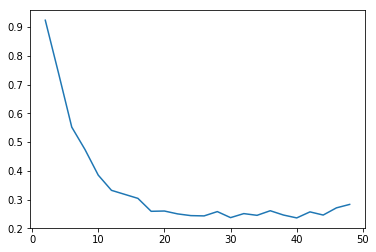

In [1]:
#  given list to get c , c2 c,3...
import numpy as np
import random
import pickle
import math
import matplotlib.pyplot as plt
%matplotlib inline
#open Cliff_indices1 put into data
with open("Cliff_indices1.pkl", "rb") as f:  
    data = pickle.load(f)
f.close()

#open Prim put into Prim
with open("Prim.pkl", "rb") as f2:  
    Prim = pickle.load(f2)
f2.close()

#open Prim_inv put into Prim_inv
with open("Inverse_of_prim.pkl", "rb") as f3:  
    Prim_inv = pickle.load(f3)
f3.close()
####################################################initial state#############################################################
#given probability  NOT Probability amplitude
#[target , ud , du , dd]
e_ud=0.01                 #error probability  NOT Probability amplitude
e_du=0                  
e_dd=0
def error_initial_state(e1,e2,e3):
    return np.matrix([[math.sqrt(1-e1*e1-e2*e2-e3*e3),math.sqrt(e1),math.sqrt(e2),math.sqrt(e3)]]).getH()
initial = error_initial_state(e_ud,e_du,e_dd)
####################################################initial state#############################################################
#############################################Randomized Benchmarking##########################################################
#given list , return s = c0*c1*c2....
def get_s(g1):               
    p = np.identity(4)                             # 計數器for p@p1@p2....
    for i in range(len(g1)):
        array = g1[i]
        for j in range(len(array)):
            p = p@Prim[array[j]]                  #s=p*p*p*p*p*p*p....
    return p
#given list , return c^-1 
def c_m(c1):
    p1 = np.identity(4)
    c1.reverse()
    for i in range(len(c1)):
        a = c1[i]
        a.reverse()
        for j in range(len(a)):
            inv_a=Prim_inv[a[j]]
            for k in range(len(inv_a)):
                p1=p1@Prim[inv_a[k]]
    return p1
x= np.arange(2,50,2)

y=[]

for m in x:
    num_uu =0
    K = 1000                                            # of S sequence 相同長度 重複取k次
    print(m)
    for i in range(K):    
        list2 = random.choices(data,k=m-1)               #data 隨便可重複取m個
        seq_k = get_s(list2)@c_m(list2)          # k_th seq
#############################################Randomized Benchmarking##########################################################
#############################################Readout##########################################################################
        e_readout=0.01
        final_prob=np.square(np.abs(seq_k@initial))
        final_prob[0]=final_prob[0]*(1-e_readout)
        uu_count=[1,0,0,0]
        a=random.choices(uu_count,weights=final_prob, k=1)
        num_uu=num_uu+a[0]
    y.append(num_uu/K)


print(y)

plt.plot(x,y)